#Carga inicial de datos



In [1]:
path_databaseWave7 = 'https://media.githubusercontent.com/media/giovy79/MCDA_TesisGrado/main/Data/WVS_Cross-National_Wave_7_csv_v5_0.csv'

In [2]:
import pandas as pd

dataOriginal = pd.read_csv(path_databaseWave7)
dataOriginal.shape

<ipython-input-2-818d27a44501>:3: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  dataOriginal = pd.read_csv(path_databaseWave7)


(94278, 606)

# Selección de preguntas para el modelo SEM

##Unificar preguntas para el estudio

In [3]:
#Preguntas finales para el estudio
dfWVSPreguntasEstudio = dataOriginal[[
    #social values, attitudes & stereotypes
    'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q12', 'Q16', 'Q17', 'Q18', 'Q22','Q25', 'Q27', 'Q28', 'Q29', 'Q32', 'Q34', 'Q35', 'Q37', 'Q38', 'Q39',
    'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45',
    #social values, attitudes & stereotypes
    'Q46', 'Q47', 'Q48', 'Q49', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56',
    #social capital, trust and organizational membership
    'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q70', 'Q71', 'Q73', 'Q74', 'Q75', 'Q77', 'Q78', 'Q79',
    'Q80', 'Q81', 'Q90', 'Q94', 'Q95', 'Q96', 'Q97', 'Q98', 'Q99', 'Q100', 'Q101', 'Q102', 'Q103', 'Q104', 'Q105',
    #economic values
    'Q106', 'Q107', 'Q108', 'Q109', 'Q110', 'Q111',
    #corruption
    'Q112', 'Q113', 'Q114', 'Q115', 'Q116', 'Q117', 'Q118', 'Q119', 'Q120',
    #migration
    'Q121', 'Q122', 'Q123', 'Q124', 'Q125', 'Q126', 'Q127', 'Q128', 'Q129', 'Q130',
    #security
    'Q131', 'Q132', 'Q133', 'Q134', 'Q135', 'Q136', 'Q137', 'Q138', 'Q139', 'Q140', 'Q142', 'Q143', 'Q144', 'Q145', 'Q146', 'Q150', 'Q151',
    #post-materialist index
    'Q152', 'Q153', 'Q154', 'Q155', 'Q156', 'Q157',
    #science & technology
    'Q158', 'Q160', 'Q161', 'Q162', 'Q163',
    #religious values
    'Q164', 'Q165', 'Q166', 'Q167', 'Q168', 'Q169', 'Q170', 'Q171', 'Q172', 'Q173', 'Q174', 'Q175',
    #ethical values & norms
    'Q176', 'Q177', 'Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183', 'Q184', 'Q185', 'Q186', 'Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192', 'Q195',
    'Q196', 'Q197', 'Q198',
    #political interest and political participation
    'Q199', 'Q200', 'Q201', 'Q202', 'Q203', 'Q204', 'Q205', 'Q207', 'Q208', 'Q209', 'Q210', 'Q211', 'Q212', 'Q213', 'Q214', 'Q215', 'Q216', 'Q217',
    'Q221', 'Q222', 'Q224', 'Q232', 'Q233', 'Q234',
    #political culture and political regimes
    'Q235', 'Q236', 'Q237', 'Q238', 'Q239', 'Q241', 'Q242', 'Q243', 'Q244', 'Q245', 'Q246', 'Q247', 'Q248', 'Q249', 'Q250', 'Q251', 'Q252', 'Q253',
    'Q254', 'Q255', 'Q256', 'Q257', 'Q258',
    #demography (31 items)
    'Q263', 'Q264', 'Q269', 'Q271', 'Q273', 'Q275', 'Q279', 'Q286', 'Q287', 'Q288'
    ]]
dfWVSPreguntasEstudio.shape

(94278, 215)

##Imputación por moda

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.DataFrame(dfWVSPreguntasEstudio)

# Paso 1: Reemplazar valores negativos por NaN
df[df < 0] = pd.NA

# Paso 2: Imputación de NaN con SimpleImputer utilizando la moda
imputer = SimpleImputer(strategy='most_frequent')
dfWVSPreguntasEstudio_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
dfWVSPreguntasEstudio_imputed.shape

(94278, 215)

##Preguntas que componen el modelo SEM

In [5]:
#Preguntas para el modelo SEM1
dfWVSModeloSEM_imputedQ74 = dfWVSPreguntasEstudio_imputed[[
    #social values, attitudes & stereotypes
    'Q2','Q12','Q16','Q17','Q40','Q45',
    #social values, attitudes & stereotypes

    #social capital, trust and organizational membership
    'Q70','Q71', 'Q74',
    #economic values

    #corruption
    'Q118',
    #migration

    #security
    'Q132','Q134',
    #post-materialist index

    #science & technology

    #religious values
    'Q164','Q165','Q166','Q167','Q168','Q173','Q174',
    #ethical values & norms
    'Q177','Q178','Q179','Q180','Q181','Q195',
    #political interest and political participation

    #political culture and political regimes
    'Q253'
    #demography

    ]]

#Modelación SEM

In [ ]:
!pip install semopy
import semopy

In [ ]:
!pip install --upgrade semopy

In [8]:
dataSEMQ74 = dfWVSModeloSEM_imputedQ74

In [9]:
import pandas as pd
from semopy import Model, Optimizer, calc_stats

# Especificar las relaciones del modelo
model_spec = """
  # measurement model
    Corruption  =~  Q118
    Regulative  =~  Q45 + Q70  +  Q71  +  Q74  +  Q132 + Q134
    Normative   =~  Q40 + Q177 +  Q178 +  Q179 +  Q180 + Q181 + Q195
    Cognitive   =~  Q2  + Q12  +  Q16  +  Q17  +  Q164 + Q165 + Q166 + Q167 + Q168 + Q173 + Q174 + Q253
  # regressions
    Corruption ~ Regulative + Normative + Cognitive
"""

# Instanciar el modelo
model = Model(model_spec)

# Ajustar el modelo
result = model.fit(dataSEMQ74)

# Mostrar resultados del modelo
estimates = model.inspect()
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Corruption,~,Regulative,8.433182,1.047753,8.048824,0.0
1,Corruption,~,Normative,2.157768,0.206583,10.445056,0.0
2,Corruption,~,Cognitive,0.746129,0.107149,6.963467,0.0
3,Q118,~,Corruption,1.000000,-,-,-
4,Q45,~,Regulative,1.000000,-,-,-
...,...,...,...,...,...,...,...
57,Q40,~~,Q40,1.049341,0.004834,217.053805,0.0
58,Q45,~~,Q45,0.556534,0.002564,217.059205,0.0
59,Q70,~~,Q70,0.407832,0.002842,143.524065,0.0
60,Q71,~~,Q71,0.420028,0.003143,133.646715,0.0


In [ ]:
# Calcular y mostrar índices de ajuste
fit_indices = calc_stats(model)
fit_indices

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,293,325,123903.959835,0.0,640432.585051,0.80689,0.806531,0.785401,0.806531,0.7858,0.066895,113.371519,661.703701,1.31424


##Analisis de cargas factoriales

In [ ]:
import pandas as pd
from semopy import Model

# Especificar las relaciones del modelo
model_spec = """
  # measurement model
    Corruption  =~  Q118
    Regulative  =~  Q45 + Q70  +  Q71  +  Q74  +  Q132 + Q134
    Normative   =~  Q40 +  Q177 + Q178 +  Q179 + Q180 + Q181 + Q195
    Cognitive   =~  Q2  + Q12  +  Q16  +  Q17  +  Q164 + Q165 + Q166 + Q167 + Q168 + Q173 + Q174 + Q253
  # regressions
    Corruption ~ Regulative + Normative + Cognitive
"""

# Instanciar el modelo
model = Model(model_spec)

# Ajustar el modelo
# Supongamos que 'dataSEMQ74' es el DataFrame que contiene los datos
result = model.fit(dataSEMQ74)


In [ ]:
# Inspeccionar los parámetros del modelo
param_matrix = model.inspect()

# Verificar que `param_matrix` contiene las filas esperadas
print(param_matrix.head(20))

          lval op        rval   Estimate  Std. Err    z-value p-value
0   Corruption  ~  Regulative   8.510295  1.067146   7.974818     0.0
1   Corruption  ~   Normative   2.173886   0.20981  10.361199     0.0
2   Corruption  ~   Cognitive   0.753151  0.108396   6.948122     0.0
3         Q118  ~  Corruption   1.000000         -          -       -
4          Q45  ~  Regulative   1.000000         -          -       -
5          Q70  ~  Regulative  29.998546  3.729285   8.044048     0.0
6          Q71  ~  Regulative  32.421760  4.030413   8.044277     0.0
7          Q74  ~  Regulative  28.077132  3.490462   8.043958     0.0
8         Q132  ~  Regulative  -8.259058  1.036141  -7.970976     0.0
9         Q134  ~  Regulative  -6.095070  0.768297  -7.933222     0.0
10         Q40  ~   Normative   1.000000         -          -       -
11        Q177  ~   Normative  34.411443  3.102371   11.09198     0.0
12        Q178  ~   Normative  37.362377  3.366208  11.099248     0.0
13        Q179  ~   

In [ ]:
# Inspeccionar los parámetros del modelo
param_matrix = model.inspect()

# Definir las variables observadas para cada factor latente
latent_vars = {
    'Corruption': ['Q118'],
    'Regulative': ['Q45', 'Q70', 'Q71', 'Q74', 'Q132', 'Q134'],
    'Normative': ['Q40', 'Q177', 'Q178', 'Q179', 'Q180', 'Q181', 'Q195'],
    'Cognitive': ['Q2', 'Q12', 'Q16', 'Q17', 'Q164', 'Q165', 'Q166', 'Q167', 'Q168', 'Q173', 'Q174', 'Q253']
}

# Filtrar las cargas factoriales
filtered_loadings = []
for latent, observeds in latent_vars.items():
    for observed in observeds:
        match = param_matrix[(param_matrix['lval'] == observed) & (param_matrix['rval'] == latent)]
        if not match.empty:
            filtered_loadings.append(match.iloc[0])

# Convertir la lista de cargas factoriales a un DataFrame
loadings = pd.DataFrame(filtered_loadings)

# Convertir a un DataFrame pivotado
loadings_df = loadings.pivot(index='lval', columns='rval', values='Estimate')
loadings_df.columns.name = None
loadings_df.index.name = 'Variables Observadas'

# Verificar que las cargas factoriales han sido extraídas correctamente
print(loadings_df)

                      Cognitive  Corruption  Normative  Regulative
Variables Observadas                                              
Q118                        NaN         1.0        NaN         NaN
Q12                    0.414957         NaN        NaN         NaN
Q132                        NaN         NaN        NaN   -8.259058
Q134                        NaN         NaN        NaN   -6.095070
Q16                    0.515883         NaN        NaN         NaN
Q164                  70.949914         NaN        NaN         NaN
Q165                  -9.022521         NaN        NaN         NaN
Q166                 -10.197035         NaN        NaN         NaN
Q167                 -11.830196         NaN        NaN         NaN
Q168                 -12.175766         NaN        NaN         NaN
Q17                   -2.653703         NaN        NaN         NaN
Q173                 -12.504353         NaN        NaN         NaN
Q174                  -0.705973         NaN        NaN        

<ipython-input-15-cd258f0e74e0>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(valid_loadings.index, rotation=90)


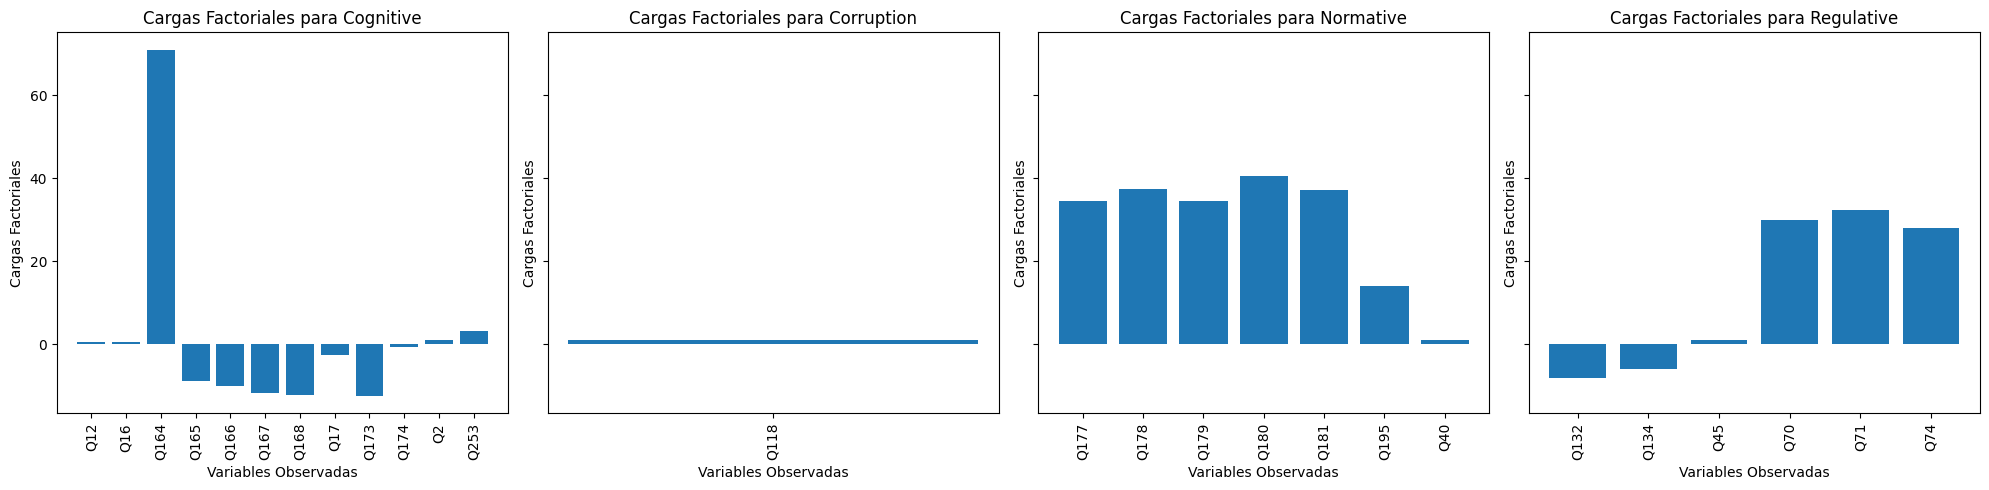

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar las cargas factoriales
def plot_factor_loadings(loadings_df):
    num_factors = loadings_df.shape[1]
    fig, axes = plt.subplots(1, num_factors, figsize=(5*num_factors, 5), sharey=True)

    for i, factor in enumerate(loadings_df.columns):
        # Filtrar valores no NaN para graficar
        valid_loadings = loadings_df[factor].dropna()
        axes[i].bar(valid_loadings.index, valid_loadings.values)
        axes[i].set_title(f'Cargas Factoriales para {factor}')
        axes[i].set_xticklabels(valid_loadings.index, rotation=90)
        axes[i].set_xlabel('Variables Observadas')
        axes[i].set_ylabel('Cargas Factoriales')

    plt.tight_layout()
    plt.show()

plot_factor_loadings(loadings_df)




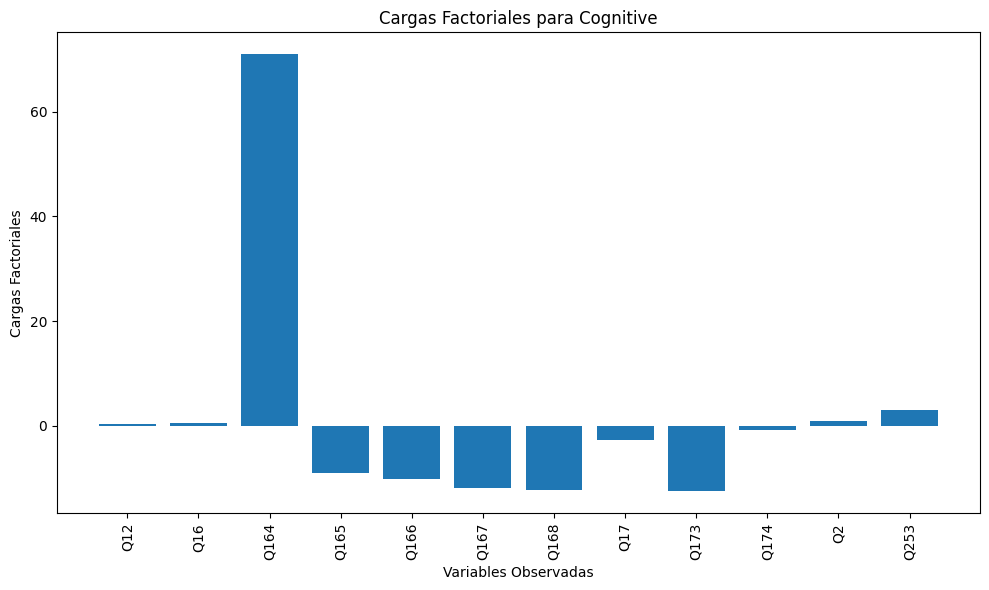

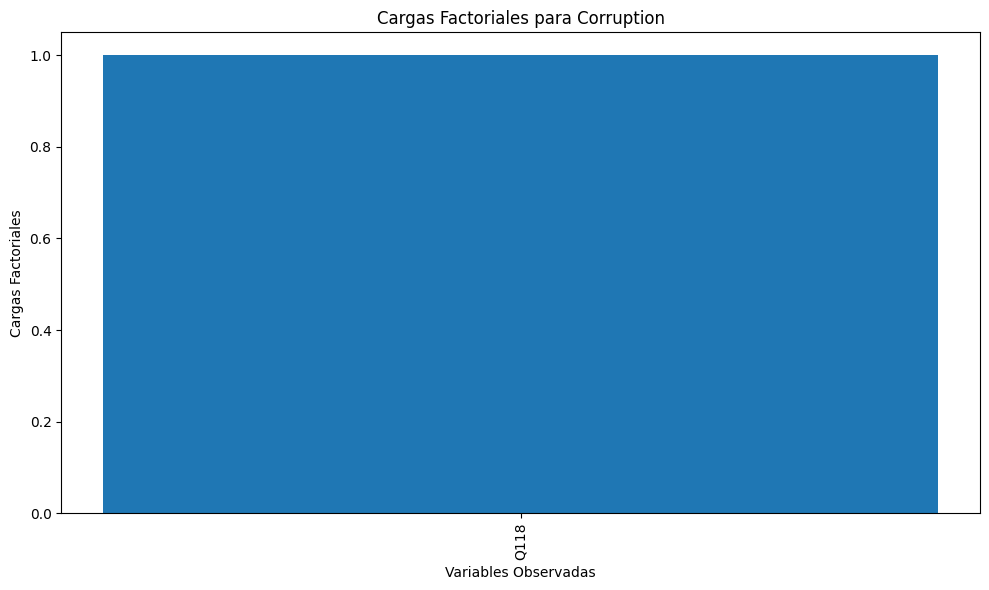

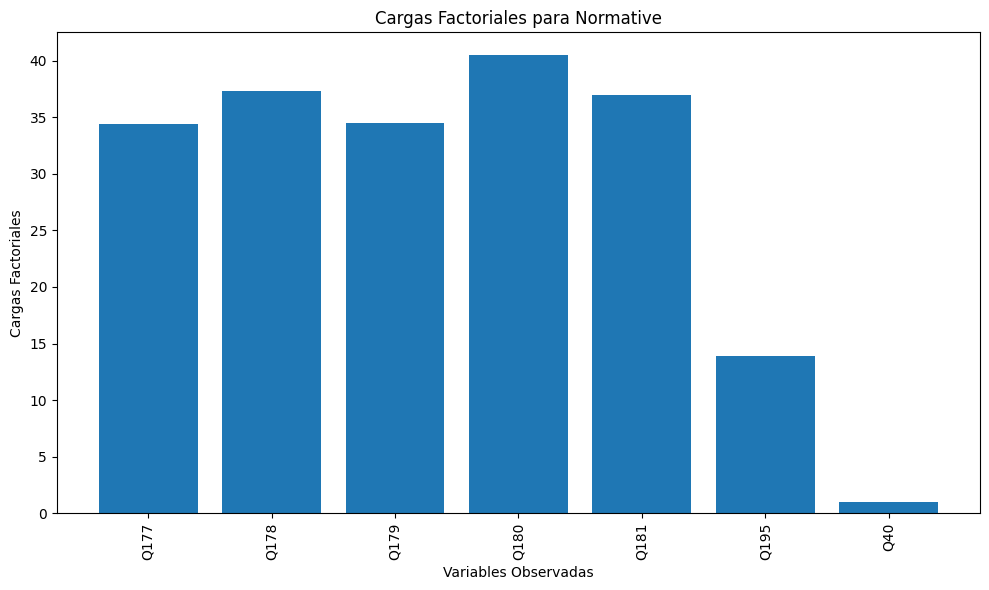

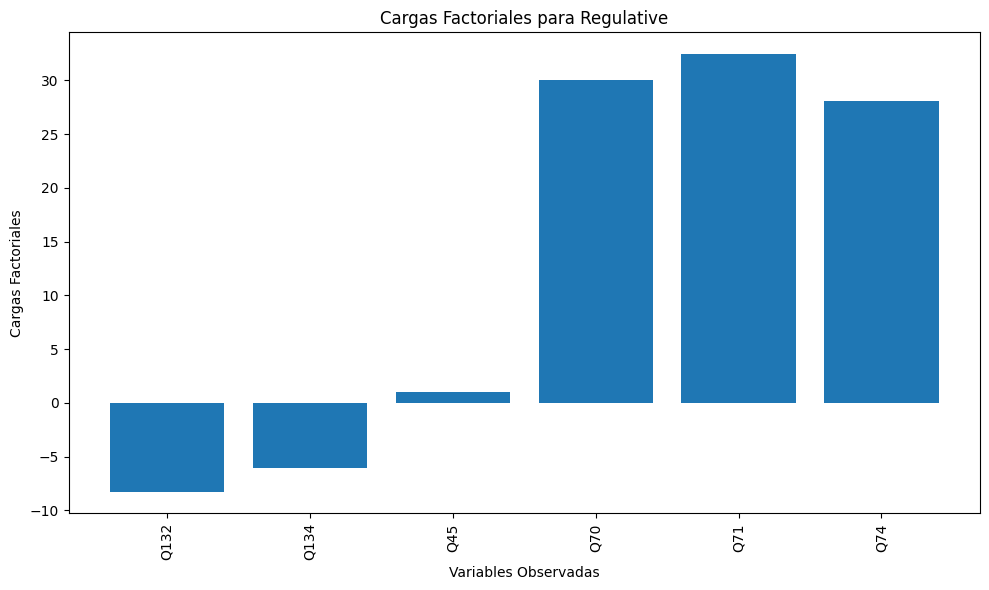

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar las cargas factoriales individualmente
def plot_factor_loadings_individual(loadings_df):
    num_factors = loadings_df.shape[1]

    for factor in loadings_df.columns:
        # Crear una nueva figura para cada factor
        plt.figure(figsize=(10, 6))

        # Filtrar valores no NaN para graficar
        valid_loadings = loadings_df[factor].dropna()
        plt.bar(valid_loadings.index, valid_loadings.values)
        plt.title(f'Cargas Factoriales para {factor}')
        plt.xticks(rotation=90)
        plt.xlabel('Variables Observadas')
        plt.ylabel('Cargas Factoriales')

        plt.tight_layout()
        plt.show()

plot_factor_loadings_individual(loadings_df)


### UMAP y Clusterización


In [ ]:
pip install umap-learn

###Comparativo preguntas modelo SEM VS clustering

Pilar Cognitivo

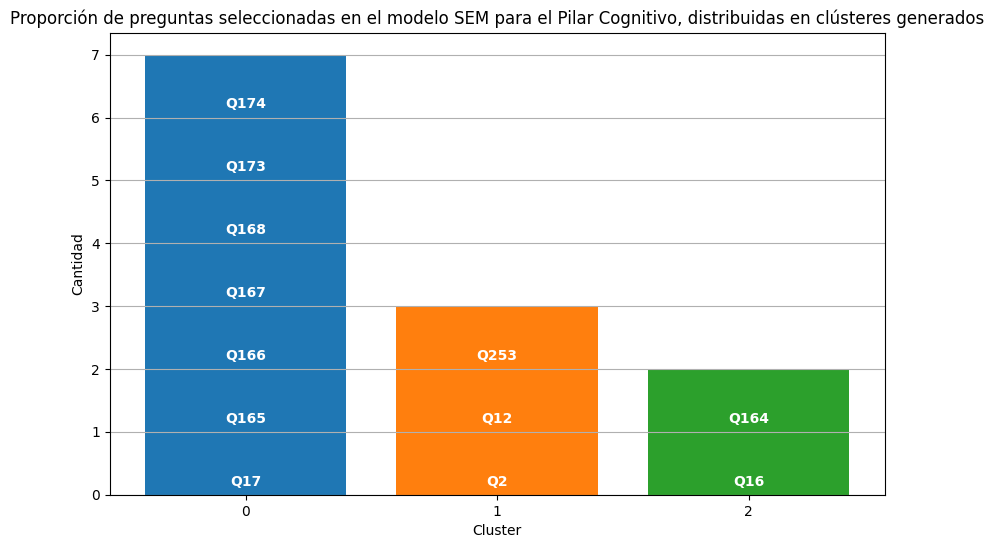

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el dataframe con los datos proporcionados
dataCognitive = {
    'Pregunta': ['Q16', 'Q164', 'Q2', 'Q12', 'Q253', 'Q17', 'Q165', 'Q166', 'Q167', 'Q168', 'Q173', 'Q174'],
    'Cluster': [2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(dataCognitive)

# Contar la cantidad de preguntas por cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Definir una paleta de colores consistente con la visualización UMAP
palette = sns.color_palette("tab10", 3)

# Crear el histograma
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=[palette[i] for i in cluster_counts.index])

# Añadir las etiquetas de las preguntas dentro de cada barra
for bar, cluster in zip(bars, cluster_counts.index):
    questions = df[df['Cluster'] == cluster]['Pregunta'].values
    for idx, question in enumerate(questions):
        plt.text(bar.get_x() + bar.get_width() / 2, idx + 0.1, question, ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')

plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.title('Proporción de preguntas seleccionadas en el modelo SEM para el Pilar Cognitivo, distribuidas en clústeres generados')
plt.xticks([0, 1, 2], rotation=0)  # Asegurar que solo se muestren los valores 0, 1 y 2 en el eje X
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()


Pilar Normativo

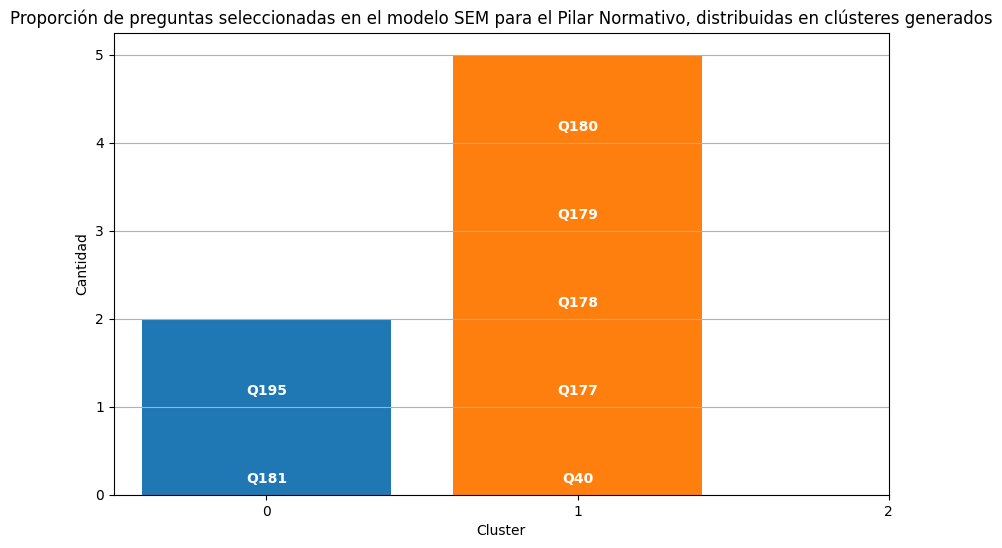

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el dataframe con los datos proporcionados
dataNormative = {
    'Pregunta': ['Q40', 'Q177', 'Q178', 'Q179', 'Q180', 'Q181', 'Q195'],
    'Cluster': [1, 1, 1, 1, 1, 0, 0]
}

df = pd.DataFrame(dataNormative)

# Contar la cantidad de preguntas por cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Definir una paleta de colores consistente con la visualización UMAP
palette = sns.color_palette("tab10", 3)

# Crear el histograma
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=[palette[i] for i in cluster_counts.index])

# Añadir las etiquetas de las preguntas dentro de cada barra
for bar, cluster in zip(bars, cluster_counts.index):
    questions = df[df['Cluster'] == cluster]['Pregunta'].values
    for idx, question in enumerate(questions):
        plt.text(bar.get_x() + bar.get_width() / 2, idx + 0.1, question, ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')

plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.title('Proporción de preguntas seleccionadas en el modelo SEM para el Pilar Normativo, distribuidas en clústeres generados')
plt.xticks([0, 1, 2], rotation=0)  # Asegurar que solo se muestren los valores 0, 1 y 2 en el eje X
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()


Pilar Regulativo

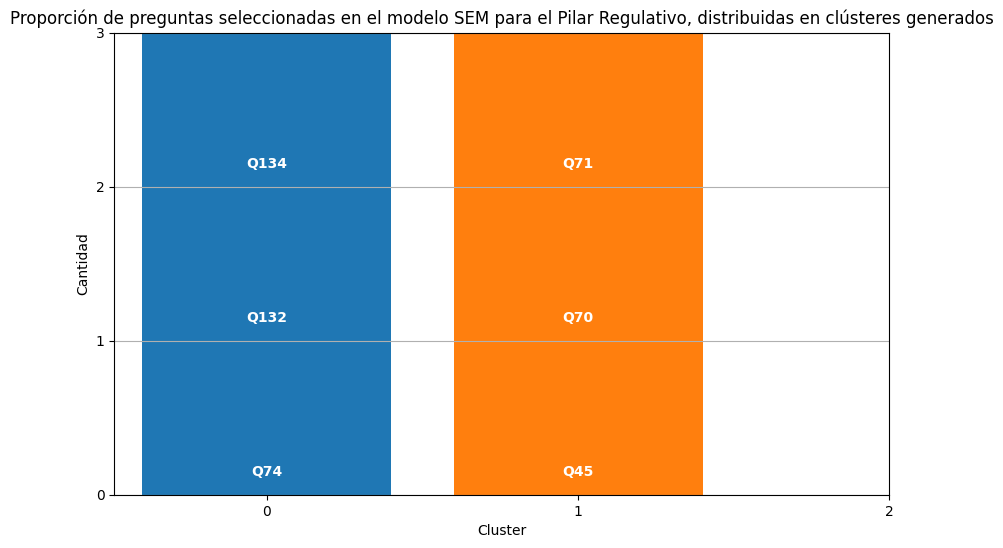

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el dataframe con los datos proporcionados
dataRegulative = {
    'Pregunta':  ['Q45', 'Q70', 'Q71', 'Q74', 'Q132', 'Q134'],
    'Cluster': [1, 1, 1, 0, 0, 0]
}

df = pd.DataFrame(dataRegulative)

# Contar la cantidad de preguntas por cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Definir una paleta de colores consistente con la visualización UMAP
palette = sns.color_palette("tab10", 3)

# Crear el histograma
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=[palette[i] for i in cluster_counts.index])

# Añadir las etiquetas de las preguntas dentro de cada barra
for bar, cluster in zip(bars, cluster_counts.index):
    questions = df[df['Cluster'] == cluster]['Pregunta'].values
    for idx, question in enumerate(questions):
        plt.text(bar.get_x() + bar.get_width() / 2, idx + 0.1, question, ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')

plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.title('Proporción de preguntas seleccionadas en el modelo SEM para el Pilar Regulativo, distribuidas en clústeres generados')
plt.xticks([0, 1, 2], rotation=0)  # Asegurar que solo se muestren los valores 0, 1 y 2 en el eje X
plt.yticks(range(0, 4))  # Asegurar que solo se muestren valores enteros en el eje Y hasta 3
plt.ylim(0, 3)  # Limitar el eje y para que no suba más de 3
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()


###Caso especial de Q69

In [ ]:
#Preguntas para el modelo SEM1
dfWVSModeloSEM_imputedQ69 = dfWVSPreguntasEstudio_imputed[[
    #social values, attitudes & stereotypes
    'Q2','Q12','Q16','Q17','Q40','Q45',
    #social values, attitudes & stereotypes

    #social capital, trust and organizational membership
    'Q70','Q71', 'Q69',
    #economic values

    #corruption
    'Q118',
    #migration

    #security
    'Q132','Q134',
    #post-materialist index

    #science & technology

    #religious values
    'Q164','Q165','Q166','Q167','Q168','Q173','Q174',
    #ethical values & norms
    'Q177','Q178','Q179','Q180','Q181','Q195',
    #political interest and political participation

    #political culture and political regimes
    'Q253'
    #demography

    ]]

In [ ]:
dataSEMQ69 = dfWVSModeloSEM_imputedQ69

In [ ]:
import pandas as pd
from semopy import Model, Optimizer, calc_stats

# Especificar las relaciones del modelo
model_spec = """
  # measurement model
    Corruption  =~  Q118
    Regulative  =~  Q45 + Q70  +  Q71  +  Q69  +  Q132 + Q134
    Normative   =~  Q40 + Q118 +  Q177 +  Q178 +  Q179 + Q180 + Q181 + Q195
    Cognitive   =~  Q2  + Q12  +  Q16  +  Q17  +  Q164 + Q165 + Q166 + Q167 + Q168 + Q173 + Q174 + Q253
  # regressions
    Corruption ~ Regulative + Normative + Cognitive
"""

# Instanciar el modelo
model = Model(model_spec)

# Ajustar el modelo
result = model.fit(dataSEMQ69)

# Mostrar resultados del modelo
estimates = model.inspect()
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Corruption,~,Regulative,8.192897,0.887308,9.233433,0.0
1,Corruption,~,Normative,0.821161,0.063483,12.935219,0.0
2,Corruption,~,Cognitive,0.630840,0.083679,7.538844,0.0
3,Q118,~,Corruption,1.000000,-,-,-
4,Q118,~,Normative,0.782980,0.064295,12.177971,0.0
...,...,...,...,...,...,...,...
58,Q40,~~,Q40,1.048749,0.004833,217.017092,0.0
59,Q45,~~,Q45,0.555885,0.002561,217.058408,0.0
60,Q69,~~,Q69,0.365401,0.00272,134.35169,0.0
61,Q70,~~,Q70,0.266397,0.002824,94.329101,0.0
